In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/OR - 7.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,-0.289947,0.012122,1
117952,0.007716,-0.063485,1
42613,0.190049,0.368175,1
43567,0.285074,0.216755,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.544564,-0.450356,1
54412,1.083036,-0.001233,1
50632,-1.123239,-0.382145,1
89251,-0.068629,0.092660,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
# Random shuffle training data
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
import tensorflow as tf

Using TensorFlow backend.


In [8]:
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'relu'

In [9]:
# Input layer:
autoencoder=Sequential()
# First hidden layer, connected to input vector X. 
autoencoder.add(Dense(32, activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_test.shape[1],)
               )
         )

autoencoder.add(Dense(2, activation=act_func, kernel_initializer='glorot_uniform'))

autoencoder.add(Dense(32, activation=act_func, kernel_initializer='glorot_uniform'))

autoencoder.add(Dense(X_test.shape[1], kernel_initializer='glorot_uniform'))


autoencoder.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [10]:
NUM_EPOCHS=100
BATCH_SIZE=1000
history=autoencoder.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1,
                  shuffle = True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 0s 3us/step - loss: 0.0597 - accuracy: 0.8184 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0046 - accuracy: 0.8796 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0036 - accuracy: 0.8796 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0035 - accuracy: 0.8796 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0035 - accuracy: 0.8796 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0035 - accuracy: 0.8796 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [============================

174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9478 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 56/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9483 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 57/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9492 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 58/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9499 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 59/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9505 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 60/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9514 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 61/100
174463/174463 [==============================] - 0s 2us/step - loss: 0.0012 - accuracy: 0.9521 - val

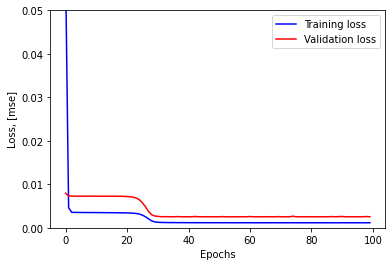

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

In [12]:
pred_train = autoencoder.predict(train)

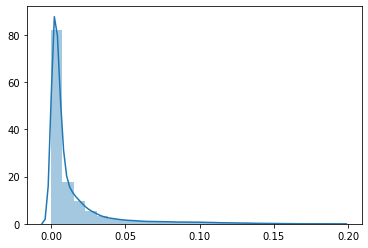

In [13]:
import seaborn as sns

scored_train = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored_train, bins = 25, kde= True);
#g.set(xlim=(0.05,0.10), ylim=(0, 1))
plt.show()

In [14]:
TH = 0.1

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

scored_train

,Loss_mae,Threshold,Anomaly
0,0.002919,0.1,False
1,0.005633,0.1,False
2,0.004176,0.1,False
3,0.003299,0.1,False
4,0.001658,0.1,False
...,...,...,...
193843,0.020084,0.1,False
193844,0.005304,0.1,False
193845,0.017154,0.1,False
193846,0.001067,0.1,False


In [15]:
scored_train['Loss_mae'].mean()

0.01380632248025856

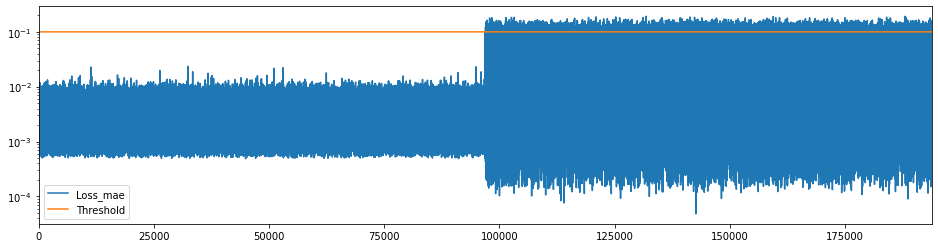

In [16]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])

In [17]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.002919,0.1,False
1,0.005633,0.1,False
2,0.004176,0.1,False
3,0.003299,0.1,False
4,0.001658,0.1,False
...,...,...,...
193843,0.020084,0.1,False
193844,0.005304,0.1,False
193845,0.017154,0.1,False
193846,0.001067,0.1,False


In [18]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96967   0.123902        0.1     True
96988   0.100016        0.1     True
97048   0.138778        0.1     True
97093   0.153132        0.1     True
97094   0.122448        0.1     True
...          ...        ...      ...
193777  0.116083        0.1     True
193778  0.138530        0.1     True
193782  0.112798        0.1     True
193788  0.112847        0.1     True
193840  0.131187        0.1     True

[3876 rows x 3 columns]
(3876, 3)


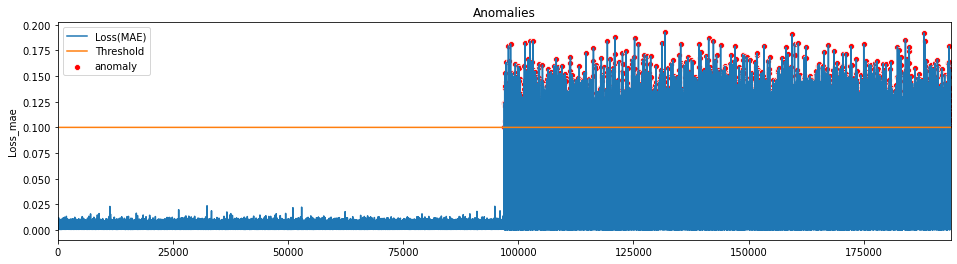

In [19]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.legend();

In [20]:
pred_test = autoencoder.predict(test)

In [21]:
score = autoencoder.evaluate(test,test)
score

48462/48462 [==============================] - 1s 15us/step


[0.0012948684040992651, 0.9665717482566833]

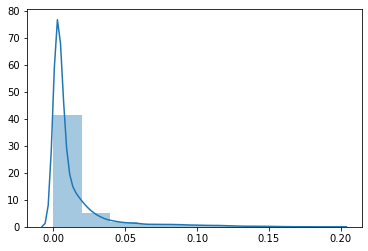

In [22]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
#g.set(xlim=(1,1.5), ylim=(0, 0.5))
plt.show()

In [23]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.002013,0.1,False
1,0.002318,0.1,False
2,0.005020,0.1,False
3,0.007447,0.1,False
4,0.000815,0.1,False
...,...,...,...
48457,0.000139,0.1,False
48458,0.070266,0.1,False
48459,0.042949,0.1,False
48460,0.012090,0.1,False


In [24]:
scored_test['Loss_mae'].mean()

0.013837332365064396

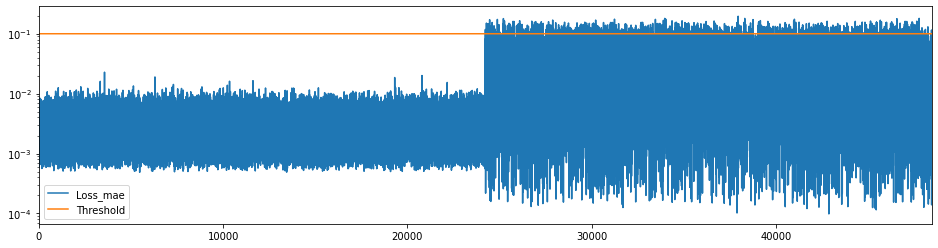

In [25]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])

In [26]:
OR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(OR_anomalies)
print(OR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24234  0.117653        0.1     True
24266  0.105745        0.1     True
24267  0.109649        0.1     True
24275  0.112984        0.1     True
24292  0.150521        0.1     True
...         ...        ...      ...
48104  0.104558        0.1     True
48120  0.118218        0.1     True
48256  0.130395        0.1     True
48265  0.111855        0.1     True
48451  0.115366        0.1     True

[952 rows x 3 columns]
(952, 3)


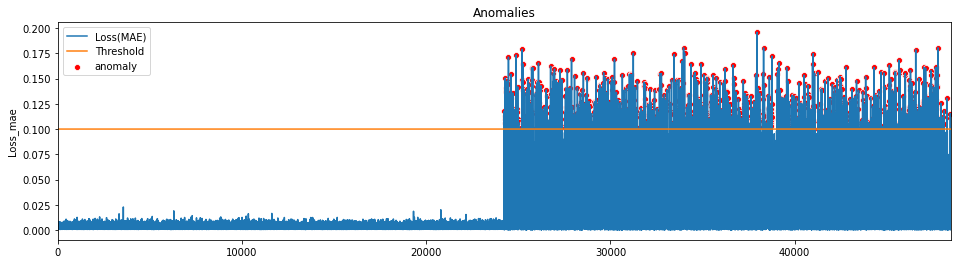

In [27]:
f, (ax2) = plt.subplots(figsize=(16, 4))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=OR_anomalies.index , y=OR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.legend();

In [28]:
print(score[1])

0.9665717482566833


In [29]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 96.66%


In [30]:
print("Anomalies: {}".format(OR_anomalies['Anomaly'].count()))

Anomalies: 952
